In [3]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline
tqdm.pandas()

image0_dir = "./images0"
input_dir = "./train/input"
target_dir = "./train/target"
noise_dir = "./train/noise"

In [4]:
data = pd.DataFrame(columns=["input", "target", "noise"])
image_names = os.listdir(image0_dir)

input_images = sorted([filename for filename in image_names if not filename.endswith('b.png')])
target_images = sorted([filename for filename in image_names if filename.endswith('b.png')])

for directory in [input_dir, target_dir, noise_dir]:
    os.makedirs(directory, exist_ok=True)

for input_name, target_name in zip(input_images, target_images):
    input_path = os.path.join(input_dir, input_name)
    target_path = os.path.join(target_dir, target_name)
    noise_path = os.path.join(noise_dir, f"{input_name.split('.')[0]}n.png")

    new_data_row = pd.DataFrame({"input": [input_path], "target": [target_path], "noise": [noise_path]})
    data = pd.concat([data, new_data_row], ignore_index=True)

    shutil.copy2(os.path.join(image0_dir, input_name), input_path)
    shutil.copy2(os.path.join(image0_dir, target_name), target_path)

    input_img = cv2.imread(os.path.join(image0_dir, input_name))
    target_img = cv2.imread(os.path.join(image0_dir, target_name))

    noise = input_img - target_img
    cv2.imwrite(noise_path, noise)

In [5]:
data.sample(5)

,input,target,noise
2916,input\002916.png,target\002916b.png,noise\002916n.png
4123,input\004123.png,target\004123b.png,noise\004123n.png
792,input\000792.png,target\000792b.png,noise\000792n.png
2100,input\002100.png,target\002100b.png,noise\002100n.png
200,input\000200.png,target\000200b.png,noise\000200n.png


In [6]:
data.to_csv("./train/labels.csv", index=False)

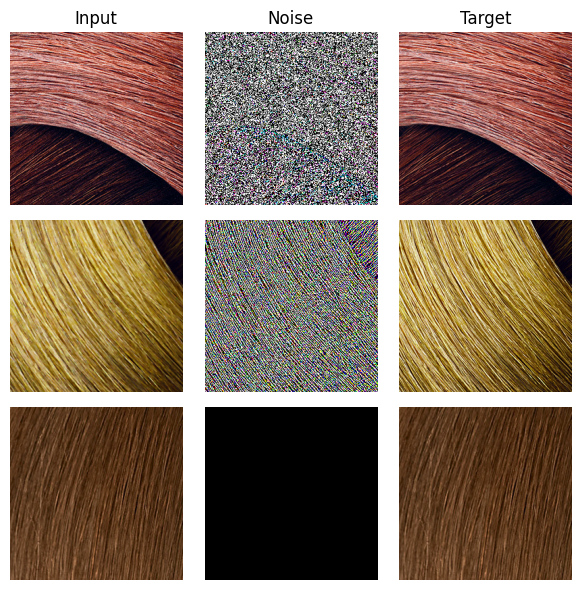

In [8]:
def display_image_grid(image_df):
    fig, axes = plt.subplots(len(image_df), 3, figsize=(6, len(image_df) * 2))

    axes[0, 0].set_title("Input")
    axes[0, 1].set_title("Noise")
    axes[0, 2].set_title("Target")

    for i, (input_p, target_p, noise_p) in enumerate(image_df.values):
        input_image = cv2.imread(input_p)
        target_image = cv2.imread(target_p)
        noise_image = cv2.imread(noise_p)

        input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        target_image_rgb = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
        output_image_rgb = cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB)

        for j, image in enumerate([input_image_rgb, output_image_rgb, target_image_rgb]):
            axes[i, j].imshow(image)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

display_image_grid(data.sample(3))

4252it [01:37, 43.64it/s]


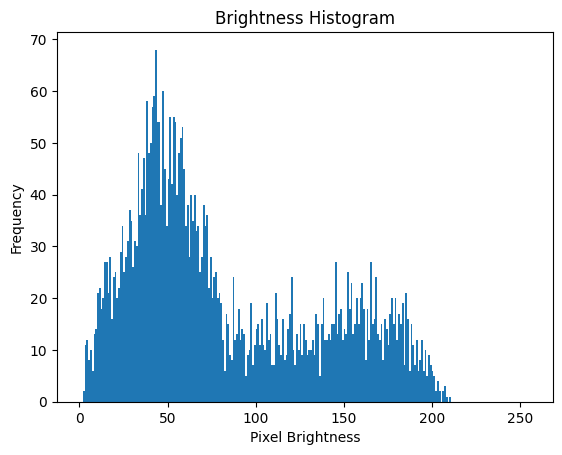

In [9]:
brightness_values = []

for _, row in tqdm(data.iterrows()):
    image = cv2.imread(os.path.join(row['input']))
    brightness_values.append(np.mean(image))

plt.hist(brightness_values, bins=256, range=[0, 256])
plt.title('Brightness Histogram')
plt.xlabel('Pixel Brightness')
plt.ylabel('Frequency')
plt.show()